### Tải dữ liệu

In [1]:
import pandas as pd
import numpy as np
sms = pd.read_csv('sms-spam.csv')
sms.head(5)

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
# xây dựng tên hàng cho dataframe bow
index = ['sms{}{}'.format(i, '!'*j) for (i, j) in zip(range(len(sms)), sms.spam)]
index[0:5]

['sms0', 'sms1', 'sms2!', 'sms3', 'sms4']

In [3]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4837 entries, 0 to 4836
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   spam    4837 non-null   int64 
 1   text    4837 non-null   object
dtypes: int64(1), object(1)
memory usage: 75.7+ KB


### Tiền xử lý dữ liệu

-	Ở đây em chuyển dữ liệu về dạng BOW vector bằng cách sử dụng hàm CountVectorizer trong sklearn. Trong đó trước khi chuyển em sử dụng casual_tokenize để tách tin nhắn thành các từ.
-	Sau đó lưu ma trận BOW vào DataFrame

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import casual_tokenize
# đảm bảo kết quả ngẫu nhiên sinh ra như nhau qua các lần chạy
np.random.seed(42)
# Xây dựng vector BOW cho mỗi văn bản
counter = CountVectorizer(tokenizer = casual_tokenize)
bow_docs = pd.DataFrame(counter.fit_transform(raw_documents=sms.text).toarray(), index = index)
bow_docs

,0,1,2,3,4,5,6,7,8,9,...,9222,9223,9224,9225,9226,9227,9228,9229,9230,9231
sms0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sms1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sms2!,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
sms3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sms4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sms4832!,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sms4833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sms4834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sms4835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Đặt tên lại cho tên cột của dataframe trên: 
-	counter.vocabulary_ : trả về dictionary với (key, value) tương ứng là (index, vocab) nhưng chưa được sắp xếp
-	zip([2, 1, 3], ['b', 'a', 'c']) --> iterator của tập các chuỗi (2, 'b'), (1, 'a'), (3, 'c')
-	the_list = sorted(zip([2, 1, 3], ['b', 'a', 'c'])) --> [(1, 'a'), (2, 'b'), (3, 'c')]
-	zip(*the_list) ~ zip((1, 'a'), (2, 'b'), (3, 'c')) --> [(1, 2, 3), (‘a’, ‘b’, ‘c’)]  
tức * giúp unpack list

In [6]:
# do counter.vocabulary_ trả về tập từ điển (index, vocabulary) chưa được sắp xếp
# tách column_nums: index tăng dần, terms là tập các từ tương ứng 
column_nums, terms = zip(*sorted(zip(counter.vocabulary_.values(), counter.vocabulary_.keys())))
print(column_nums[0:5])
print(terms[0:10])

(0, 1, 2, 3, 4)
('!', '"', '#', '#150', '#5000', '$', '%', '&', "'", '(')


Sau đó đặt lại tên cột như sau:

In [7]:
bow_docs.columns = terms
bow_docs.head(5)

,!,"""",#,#150,#5000,$,%,&,',(,...,ü'll,–,—,‘,’,“,…,┾,〨ud,鈥
sms0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sms1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sms2!,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
sms3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sms4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
bow_docs.loc['sms0'][bow_docs.loc['sms0']>0].head()

,            1
..           1
...          2
amore        1
available    1
Name: sms0, dtype: int64

### Xây dựng topic vector dùng LDiA

-	Sử dụng LatentDirichletAllocation có sắn trong sklearn. Ở đây số lượng topic là 16, và phương pháp học là ‘batch’ (để hiểu cụ thể xem phần LDiA trong sklearn ở trên)

In [35]:
from sklearn.decomposition import LatentDirichletAllocation as LDiA
ldia = LDiA(n_components = 16, learning_method='online')
ldia = ldia.fit(bow_docs)
ldia.components_.shape

(16, 9232)

Để lấy ra ma trận topic-term β, em gọi ra thuộc tính (.components_). Sau đó em lưu ma trận này vào trong dataframe để dễ hiển thị và xử lý:

In [36]:
columns = ['topic{}'.format(i) for i in range(ldia.n_components)]
components = pd.DataFrame(ldia.components_.T, index = terms, columns = columns)
components.head(3).round(3)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15
!,0.063,227.421,0.063,0.063,0.063,0.063,0.064,403.937,0.063,0.063,305.372,425.984,0.076,11.962,0.063,0.063
"""",0.063,0.063,0.063,0.063,0.063,0.063,0.063,11.707,0.063,0.063,0.068,0.063,0.063,0.063,248.577,0.071
#,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,6.962,0.063,0.063,0.063,0.063,0.063


Để lấy ra trận topic – document θ ta gọi hàm .transform() truyền vào tham số là tập văn bản cần lấy ra phân phối topic.

In [37]:
ldia16_topic_vectors = ldia.transform(bow_docs)
ldia16_topic_vectors = pd.DataFrame(ldia16_topic_vectors, index=index, columns=columns)
ldia16_topic_vectors.head(5).round(2)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15
sms0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.51,0.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00
sms1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.67,0.01,0.01,0.01,0.01,0.12,0.01,0.12,0.01
sms2!,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.48,0.00,0.00,0.00,0.50
sms3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.55,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00
sms4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50


In [38]:
components.topic3.sort_values(ascending=False)[:20]

hi           96.635655
pix           8.449394
behind        6.790889
lookin        6.106449
doc           4.766511
who's         4.621674
wkend         4.438886
tihs          4.320228
yuo           4.320226
alone         4.055953
8552          3.934560
177hp51fl     3.723308
birth         3.401643
in2           3.390381
ese           3.345078
remains       3.278667
bros          3.243083
bro           3.191472
u4            3.067376
term          2.868719
Name: topic3, dtype: float64

### Dự đoán

Để dự đoán, như bài trước em sử dụng mô hình LDA để dự đoán spam dựa trên topic vector sinh ra từ LDiA.
-	Đầu tiên chia tập topic vector từ LDiA ra làm 2 phần test và train với kích thước bằng nhau.
-	Sau đó huấn luyện LDA trên tập train và dự đoán trên tập test.


In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ldia16_topic_vectors,
                                                    sms.spam, test_size=0.5,
                                                    random_state=271828)
lda = LDA(n_components=1)
lda = lda.fit(X_train, y_train)
lda.score(X_test, y_test).round(3)

0.96

In [14]:
sms['ldia_spam'] = lda.predict(ldia16_topic_vectors)
sms.head(20)

,spam,text,ldia_spam
0,0,"Go until jurong point, crazy.. Available only ...",0
1,0,Ok lar... Joking wif u oni...,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,0,U dun say so early hor... U c already then say...,0
4,0,"Nah I don't think he goes to usf, he lives aro...",0
5,1,FreeMsg Hey there darling it's been 3 week's n...,0
6,0,Even my brother is not like to speak with me. ...,0
7,0,As per your request 'Melle Melle (Oru Minnamin...,0
8,1,WINNER!! As a valued network customer you have...,0
9,1,Had your mobile 11 months or more? U R entitle...,1


In [15]:
list(zip(*sorted(zip([1, 2], [3, 4]))))

[(1, 2), (3, 4)]

In [21]:
pd.DataFrame(np.corrcoef(np.array(ldia16_topic_vectors).T))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.000000,-0.068288,-0.139436,-0.059193,-0.068302,-0.119128,-0.087806,-0.049572,-0.113706,-0.072166,-0.043064,-0.082784,-0.068738,-0.092456,-0.041727,-0.055062
1,-0.068288,1.000000,-0.117402,-0.056247,-0.037549,-0.072748,-0.046760,-0.035912,-0.070715,-0.047329,-0.034757,-0.055594,-0.023226,-0.068167,-0.041892,-0.037733
2,-0.139436,-0.117402,1.000000,-0.118212,-0.096463,-0.187717,-0.115656,-0.069701,-0.188302,-0.152292,-0.081619,-0.106328,-0.107065,-0.125372,-0.075202,-0.080093
3,-0.059193,-0.056247,-0.118212,1.000000,-0.034915,-0.076348,-0.069360,-0.045630,-0.066844,-0.002289,-0.043426,-0.054425,-0.057259,-0.059284,-0.038156,-0.031023
4,-0.068302,-0.037549,-0.096463,-0.034915,1.000000,-0.084002,-0.069255,-0.034718,-0.066979,-0.040676,-0.045656,-0.052198,-0.057920,-0.060749,-0.037702,-0.048924
5,-0.119128,-0.072748,-0.187717,-0.076348,-0.084002,1.000000,-0.113163,-0.051023,-0.019518,-0.076153,-0.050086,-0.083406,-0.102173,-0.097324,-0.063730,-0.064079
6,-0.087806,-0.046760,-0.115656,-0.069360,-0.069255,-0.113163,1.000000,-0.036555,-0.080940,-0.054111,-0.050178,-0.067390,-0.052952,-0.080833,-0.055692,-0.029323
7,-0.049572,-0.035912,-0.069701,-0.045630,-0.034718,-0.051023,-0.036555,1.000000,-0.047123,-0.002900,-0.034737,-0.039348,-0.011736,-0.053429,-0.024981,-0.031706
8,-0.113706,-0.070715,-0.188302,-0.066844,-0.066979,-0.019518,-0.080940,-0.047123,1.000000,-0.104619,-0.058541,-0.068838,-0.075863,-0.073460,-0.039657,-0.046355
9,-0.072166,-0.047329,-0.152292,-0.002289,-0.040676,-0.076153,-0.054111,-0.002900,-0.104619,1.000000,0.026768,-0.046679,-0.060370,-0.044749,-0.001099,-0.042785


Theo dõi sự thay đổi độ chính xác qua số lượng topic. Cụ thể ở đây em xét độ chính xác của mô hình khi thay đổi số lượng topic của LDiA. 

In [42]:
import matplotlib.pyplot as plt
num_topic= [2, 5, 10, 15, 20, 25, 30]
train_score = []
test_score = []
for k in num_topic:
    ldia = LDiA(n_components = k, learning_method='batch')
    ldia = ldia.fit(bow_docs)
    ldia_topic_vectors = ldia.transform(bow_docs)
    ldia_topic_vectors = pd.DataFrame(ldia_topic_vectors)
    X_train, X_test, y_train, y_test = train_test_split(ldia_topic_vectors,
                                                    sms.spam, test_size=0.5,
                                                    random_state=271828)
    lda = LDA(n_components=1)
    lda = lda.fit(X_train, y_train)
    test_score.append(lda.score(X_test, y_test).round(3))
    train_score.append(lda.score(X_train, y_train).round(3))

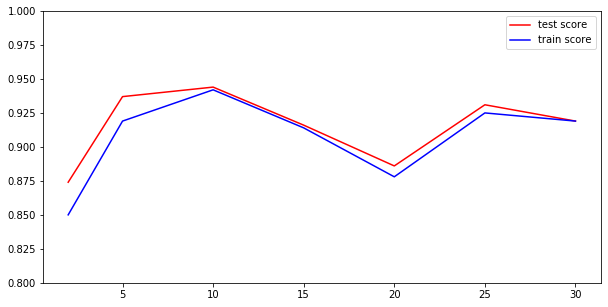

[0.85, 0.919, 0.942, 0.914, 0.878, 0.925, 0.919]
[0.874, 0.937, 0.944, 0.916, 0.886, 0.931, 0.919]


In [43]:
plt.figure(figsize = (10, 5))
plt.ylim((0.8, 1))
plt.plot(num_topic, test_score, color = 'red', label = 'test score')
plt.plot(num_topic, train_score, color = 'blue', label = 'train score')
plt.legend()
plt.show()
print(train_score)
print(test_score)

Biểu đồ trên cho thấy với số lượng topic lớn, mô hình sẽ bị overfitting (train score > test score). Số lượng topic từ 10-15 là phù hợp.

Với số topic là 16, phương pháp học ‘batch’ cho độ chính xác là 0.936, còn phương pháp ‘online’ cho độ chính xác 0.96. Dưới đây là biểu đồ thể hiện độ chính xác khi thay đổi số lượng topic với phương pháp học ‘online’. Nó cho kết quả tốt hơn so với ‘batch’. Khi số lượng topic lớn, ‘online’ generalize tốt hơn ‘batch’. 

In [40]:
import matplotlib.pyplot as plt
num_topic= [2, 5, 10, 15, 20, 25, 30]
train_score = []
test_score = []
for k in num_topic:
    ldia = LDiA(n_components = k, learning_method='online')
    ldia = ldia.fit(bow_docs)
    ldia_topic_vectors = ldia.transform(bow_docs)
    ldia_topic_vectors = pd.DataFrame(ldia_topic_vectors)
    X_train, X_test, y_train, y_test = train_test_split(ldia_topic_vectors,
                                                    sms.spam, test_size=0.5,
                                                    random_state=271828)
    lda = LDA(n_components=1)
    lda = lda.fit(X_train, y_train)
    test_score.append(lda.score(X_test, y_test).round(3))
    train_score.append(lda.score(X_train, y_train).round(3))
    

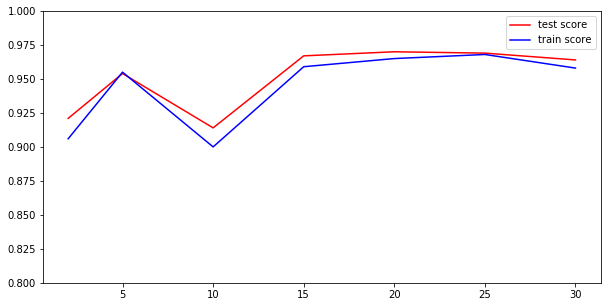

[0.906, 0.955, 0.9, 0.959, 0.965, 0.968, 0.958]
[0.921, 0.954, 0.914, 0.967, 0.97, 0.969, 0.964]


In [41]:
plt.figure(figsize = (10, 5))
plt.ylim((0.8, 1))
plt.plot(num_topic, test_score, color = 'red', label = 'test score')
plt.plot(num_topic, train_score, color = 'blue', label = 'train score')
plt.legend()
plt.show()
print(train_score)
print(test_score)